# Handwriting Recognition with Keras (CNN)

Keras on the MNIST data set.

## Importing Libraries

In [12]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

## Load MNIST Raw data

In [13]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

- 2D image custom pixel shaping
- Single color channel(gray scale = 1)
- shape (1x28x28, 28x28x1)

In [14]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

## Tensorflow version of OneHotEncoding for categorizing lables

In [15]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


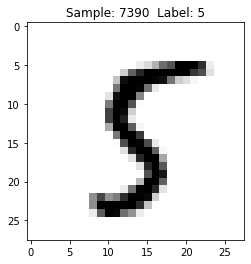

In [20]:
# Plotting the image

import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  

    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)

    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])

    # Naming the plot points and labels
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(7390)

## Implementing CNN



In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))

# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout to avoid overfitting
model.add(Dropout(0.25))

# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())

# A hidden layer to learn with
model.add(Dense(128, activation='relu'))

# Another dropout
model.add(Dropout(0.5))

# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # loss function - categorical corss entropy along with adam optimizer

In [24]:
history = model.fit(train_images, train_labels,
                    batch_size=64,
                    epochs=25,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/25
938/938 - 5s - loss: 0.2055 - accuracy: 0.9386 - val_loss: 0.0495 - val_accuracy: 0.9845 - 5s/epoch - 6ms/step
Epoch 2/25
938/938 - 5s - loss: 0.0833 - accuracy: 0.9743 - val_loss: 0.0413 - val_accuracy: 0.9870 - 5s/epoch - 5ms/step
Epoch 3/25
938/938 - 5s - loss: 0.0631 - accuracy: 0.9808 - val_loss: 0.0372 - val_accuracy: 0.9888 - 5s/epoch - 5ms/step
Epoch 4/25
938/938 - 4s - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0357 - val_accuracy: 0.9882 - 4s/epoch - 5ms/step
Epoch 5/25
938/938 - 4s - loss: 0.0425 - accuracy: 0.9866 - val_loss: 0.0310 - val_accuracy: 0.9912 - 4s/epoch - 5ms/step
Epoch 6/25
938/938 - 4s - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0313 - val_accuracy: 0.9907 - 4s/epoch - 5ms/step
Epoch 7/25
938/938 - 5s - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0312 - val_accuracy: 0.9904 - 5s/epoch - 5ms/step
Epoch 8/25
938/938 - 4s - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0301 - val_accuracy: 0.9916 - 4s/epoch - 5ms/step
Epoch 9/25
938/938 - 4s 

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027972299605607986
Test accuracy: 0.9922000169754028
